<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_5/rnn_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install matplotlib
%pip install attention

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [14]:
# import
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from attention import Attention

import matplotlib.pyplot as plt

#IMDB movie review sentiment classification dataset

https://keras.io/api/datasets/imdb/

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [17]:
"""
load data sets
"""
num_words=5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

In [18]:
"""
preprocessing

padded and slice to ~ 500 elements
"""
X_train_padded = pad_sequences(X_train, 500)
X_test_padded = pad_sequences(X_test, 500)

In [9]:
"""
modeling
"""
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=500))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu')) # strides=1, padding='valid' for default
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_4 (Dropout)         (None, None, 500)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          160064    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

In [10]:
"""
checkpointers
"""
early_stopping_checkpointer = EarlyStopping(patience=5) # monitor='val_loss' for default

In [11]:
"""
training
"""
history = model.fit(X_train_padded, y_train, validation_split=0.25, validation_data=(X_test_padded, y_test), epochs=100, batch_size=40, callbacks=[early_stopping_checkpointer])

Epoch 1/100
625/625 [==============================] - 96s 133ms/step - loss: 0.3670 - accuracy: 0.8331 - val_loss: 0.2619 - val_accuracy: 0.8932
Epoch 2/100
625/625 [==============================] - 31s 50ms/step - loss: 0.2140 - accuracy: 0.9187 - val_loss: 0.2618 - val_accuracy: 0.8958
Epoch 3/100
625/625 [==============================] - 25s 41ms/step - loss: 0.1547 - accuracy: 0.9446 - val_loss: 0.2872 - val_accuracy: 0.8851
Epoch 4/100
625/625 [==============================] - 17s 28ms/step - loss: 0.1060 - accuracy: 0.9635 - val_loss: 0.3104 - val_accuracy: 0.8837
Epoch 5/100
625/625 [==============================] - 16s 26ms/step - loss: 0.0697 - accuracy: 0.9765 - val_loss: 0.3942 - val_accuracy: 0.8836
Epoch 6/100
625/625 [==============================] - 19s 30ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.3915 - val_accuracy: 0.8801
Epoch 7/100
625/625 [==============================] - 18s 29ms/step - loss: 0.0464 - accuracy: 0.9834 - val_loss: 0.4169 - val_a

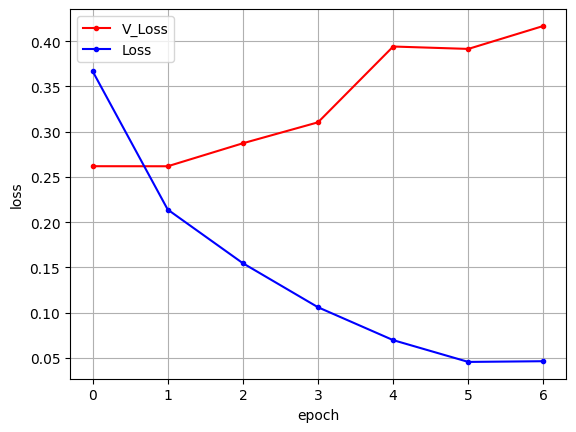

In [12]:
# show result with graph
v_loss = history.history['val_loss']
loss = history.history['loss']

g_x_len = np.arange(len(v_loss))

plt.plot(g_x_len, v_loss, marker='.', c='red', label='V_Loss')
plt.plot(g_x_len, loss, marker='.', c='blue', label='Loss')

plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#Using Attention
https://wikidocs.net/22893


In [19]:
"""
modeling with attention
"""
model_att = Sequential()
model_att.add(Embedding(input_dim=num_words, output_dim=500))
model_att.add(Dropout(0.5))
model_att.add(LSTM(64, return_sequences=True)) # return full sequence instead of the last output in the output sequence
model_att.add(Attention())
model_att.add(Dropout(0.5))
model_att.add(Dense(1, activation='sigmoid'))

model_att.summary()

model_att.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_7 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_5 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_1 (Attention)     (None, 128)               20480     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2665249 (10.17 MB)
Trainable params: 266

In [20]:
"""
checkpointers
"""
early_stopping_checkpointer = EarlyStopping(patience=5) # monitor='val_loss' for default

In [21]:
"""
training
"""
history_new = model_att.fit(X_train_padded, y_train, validation_split=0.25, validation_data=(X_test_padded, y_test), epochs=100, batch_size=40, callbacks=[early_stopping_checkpointer])

Epoch 1/100
625/625 [==============================] - 72s 112ms/step - loss: 0.3785 - accuracy: 0.8244 - val_loss: 0.2788 - val_accuracy: 0.8852
Epoch 2/100
625/625 [==============================] - 31s 50ms/step - loss: 0.2236 - accuracy: 0.9112 - val_loss: 0.2761 - val_accuracy: 0.8878
Epoch 3/100
625/625 [==============================] - 24s 39ms/step - loss: 0.1605 - accuracy: 0.9384 - val_loss: 0.2934 - val_accuracy: 0.8839
Epoch 4/100
625/625 [==============================] - 25s 40ms/step - loss: 0.1131 - accuracy: 0.9560 - val_loss: 0.3166 - val_accuracy: 0.8887
Epoch 5/100
625/625 [==============================] - 22s 35ms/step - loss: 0.0764 - accuracy: 0.9711 - val_loss: 0.4686 - val_accuracy: 0.8793
Epoch 6/100
625/625 [==============================] - 22s 35ms/step - loss: 0.0587 - accuracy: 0.9773 - val_loss: 0.4545 - val_accuracy: 0.8832
Epoch 7/100
625/625 [==============================] - 20s 32ms/step - loss: 0.0396 - accuracy: 0.9863 - val_loss: 0.4957 - val_a

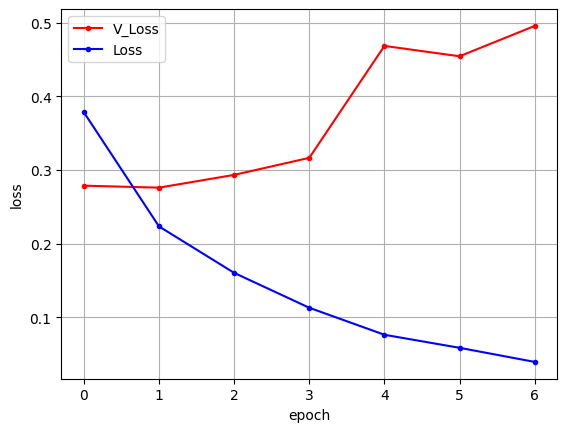

In [22]:
# show result with graph
v_loss = history_new.history['val_loss']
loss = history_new.history['loss']

g_x_len = np.arange(len(v_loss))

plt.plot(g_x_len, v_loss, marker='.', c='red', label='V_Loss')
plt.plot(g_x_len, loss, marker='.', c='blue', label='Loss')

plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()